# Aprendizaje No Supervisado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("../Datasets/HVAC.xlsx", "HISTORICO_DATOS", index_col=0)

In [3]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS",
                        "C_O_P_ INSTALACIÓN GRUPO FRÍO 1", "C_O_P_ INSTALACÍON GRUPO FRÍO 2",
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3",
                        "Fecha- hora de lectura"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]

In [4]:
data3 = data2
data3["POTENCIA TERMICA BOMBA CALOR CARLOS"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"] * 0.001163
data3["POTENCIA TERMICA BOMBA CALOR FELIPE"] = data2["KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 1"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1"] * 0.001163
data3["POTENCIA TERMICA GRUPO FRIO 2"] = data2["KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2"] * 0.001163

/Users/camilawhite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/camilawhite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/camilawhite/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

## Método Codo

In [5]:
def metodoCodo(X):
    from sklearn.cluster import KMeans
    plt.figure(figsize=(10, 8))
    wcss = []
    for i in range(1, 15):
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 15), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [6]:
dataLimpia = pd.read_excel("../Datasets/HVAC_limpio.xlsx", "HVAC_limpio", index_col=0)

## C_O_P Carlos

Datos sin limpiar de Carlos

In [7]:
dataCarlos = data3[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR CARLOS']]
dataCarlos.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.616413,132.154739,15.083257,29.447289
std,43.907480,149.917857,11.345877,13.676912
min,0.000000,0.000000,-1.400000,0.000000
25%,0.480000,9.877769,6.968000,16.940001
50%,0.500000,46.868723,13.353139,34.740002
75%,67.599998,255.914298,23.717333,42.450001
max,164.206665,592.614391,43.799999,47.889999


Datos limpios de Carlos. 

In [8]:
dataCarlosLimpio = dataLimpia[['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 
                               'TEMPERATURA EXTERIOR', 'TEMPERATURA SALIDA BOMBA CALOR CARLOS', 
                               'C_O_P BOMBA CALOR CARLOS']]
dataCarlosLimpio.describe()

,POTENCIA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR CARLOS,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR CARLOS,C_O_P BOMBA CALOR CARLOS
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.982880,134.031192,18.708072,29.768307,3.643607
std,43.766966,149.088492,8.605477,13.326841,0.377911
min,0.026667,0.251979,-1.400000,0.420000,1.785044
25%,0.480000,10.583311,11.900000,17.400000,3.643607
50%,0.500000,49.993504,18.708072,34.740002,3.643607
75%,67.599998,255.914298,23.717333,42.450001,3.660718
max,164.206665,592.614391,43.799999,47.889999,5.413333


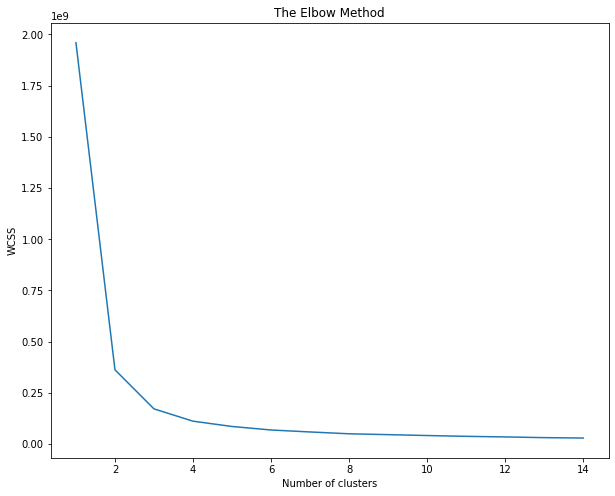

In [9]:
metodoCodo(dataCarlos)

In [10]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataCarlos)
centroids = kmeans.cluster_centers_

In [11]:
centroids

array([[  2.36841878,  21.59505459,  15.93732251,  25.71302416],
       [ 82.87622728, 303.00070049,  14.84141444,  35.1100374 ],
       [122.32563908, 439.45389956,  11.39814803,  37.89792136],
       [ 41.9650938 , 170.79340046,  14.24271345,  32.21805261]])

In [12]:
dataTest = [[89.76533508, 334.5329885, 18.70807174, 44.03733444]] #datos buenos COP=3.79 linea 37760 dataset limpio
dataTest2 = [[6.22666645050049, 181.58, 33.02, 13.9333333969116]] #datos malos COP=16.46, linea 22288 dataset sin limpiar

In [13]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([3], dtype=int32)

In [14]:
def diagnosticoFallosCarlos(cluster):
    minPotenciaCarlos = 0.02 
    maxPotenciaCarlos = 34
    minPotenciaTermicaCarlos = 0.2 
    maxPotenciaTermicaCarlos = 134
    minTempExterior = 10
    maxTempExterior = 28
    minTempSalidaCarlos = 17
    maxTempSalidaCarlos = 43
    if not ((centroids[cluster][0] > minPotenciaCarlos) and (centroids[cluster][0] <= maxPotenciaCarlos)):
        print('Revisar la POTENCIA BOMBA CALOR CARLOS.')
    if not ((centroids[cluster][1] > minPotenciaTermicaCarlos) and (centroids[cluster][1] <= maxPotenciaTermicaCarlos)):
        print('Revisar la POTENCIA TERMICA BOMBA CALOR CARLOS.')
    if not ((centroids[cluster][2] > minTempExterior) and (centroids[cluster][2] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')
    if not ((centroids[cluster][3] > minTempSalidaCarlos) and (centroids[cluster][3] <= maxTempSalidaCarlos)):
        print('Revisar la TEMPERATURA SALIDA BOMBA CALOR CARLOS.')

In [15]:
for cluster in clusters:
    diagnosticoFallosCarlos(cluster)

Revisar la POTENCIA BOMBA CALOR CARLOS.
Revisar la POTENCIA TERMICA BOMBA CALOR CARLOS.


## C_O_P Felipe

#### Datos sin limpiar de Felipe.

In [16]:
dataFelipe = data3[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 'TEMPERATURA EXTERIOR',
          'TEMPERATURA SALIDA BOMBA CALOR FELIPE']]
dataFelipe.describe()

,POTENCIA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,32.952675,114.991659,15.083257,27.899720
std,45.304465,145.959139,11.345877,13.937344
min,0.000000,0.000000,-1.400000,0.000000
25%,0.640000,4.233283,6.968000,14.794000
50%,0.700000,24.492828,13.353139,28.799999
75%,66.543999,227.389796,23.717333,41.980000
max,157.706665,592.815954,43.799999,47.889999


#### Datos limpios Felipe.

In [17]:
dataFelipeLimpio = dataLimpia[['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 
                               'TEMPERATURA EXTERIOR','TEMPERATURA SALIDA BOMBA CALOR FELIPE',
                               'C_O_P BOMBA CALOR FELIPE']]
dataFelipeLimpio.describe()

,POTENCIA BOMBA CALOR FELIPE,POTENCIA TERMICA BOMBA CALOR FELIPE,TEMPERATURA EXTERIOR,TEMPERATURA SALIDA BOMBA CALOR FELIPE,C_O_P BOMBA CALOR FELIPE
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,33.311907,118.774293,18.708072,28.203867,3.356352
std,45.173629,144.449122,8.605477,13.629520,0.286132
min,0.040000,0.251979,-1.400000,1.166667,1.862510
25%,0.640000,5.291645,11.900000,15.220000,3.356352
50%,0.700000,29.078821,18.708072,28.799999,3.356352
75%,66.543999,227.389760,23.717333,41.980000,3.356352
max,157.706665,551.289112,43.799999,47.889999,4.776893


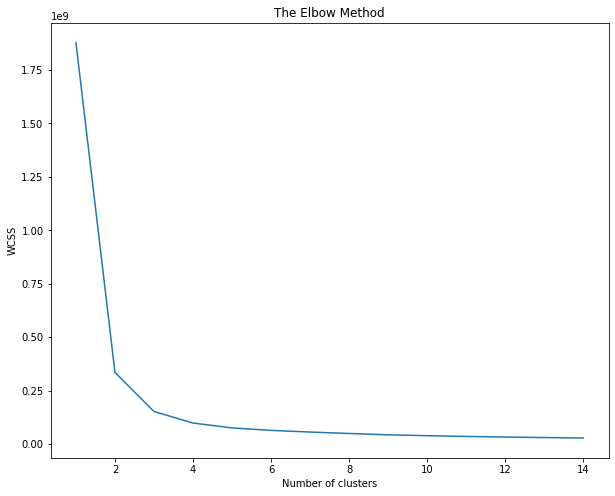

In [18]:
metodoCodo(dataFelipe)

In [19]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFelipe)
centroids = kmeans.cluster_centers_

In [20]:
centroids

array([[126.65694677, 417.85186002,  12.57918496,  34.24718953],
       [  3.37558383,  13.42841555,  15.38645247,  25.25983403],
       [ 39.26794938, 155.38615074,  15.26949074,  30.51274812],
       [ 84.0099791 , 287.23544508,  15.42350611,  32.08097912]])

In [22]:
dataTest = [[0.800000011920929, 58.2585224375, 11.3281927108765, 31.7880001068115]] #datos buenos COP=3,35 linea 8 dataset limpio
dataTest2 = [[7.25, 30.389183185546873, 11.696457862854, 36.1926651000977]] #datos malos COP=0.81, linea 2 dataset sin limpiar

In [23]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([1], dtype=int32)

In [24]:
def diagnosticoFallosFelipe(cluster):
    minPotenciaFelipe = 0.04
    maxPotenciaFelipe = 32
    minPotenciaTermicaFelipe = 0.25
    maxPotenciaTermicaFelipe = 114
    minTempExterior = 10
    maxTempExterior = 28
    minTempSalidaFelipe = 15
    maxTempSalidaFelipe = 42
    if not ((centroids[cluster][0] > minPotenciaFelipe) and (centroids[cluster][0] <= maxPotenciaFelipe)):
        print('Revisar la POTENCIA BOMBA CALOR FELIPE.')
    if not ((centroids[cluster][1] > minPotenciaTermicaFelipe) and (centroids[cluster][1] <= maxPotenciaTermicaFelipe)):
        print('Revisar la POTENCIA TERMICA BOMBA CALOR FELIPE.')
    if not ((centroids[cluster][2] > minTempExterior) and (centroids[cluster][2] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')
    if not ((centroids[cluster][3] > minTempSalidaFelipe) and (centroids[cluster][3] <= maxTempSalidaFelipe)):
        print('Revisar la TEMPERATURA SALIDA BOMBA CALOR FELIPE.')

In [25]:
for cluster in clusters:
    diagnosticoFallosFelipe(cluster)

## C_O_P Grupo Frío 1

#### Datos sin limpiar Grupo Frío 1.

In [26]:
dataFrio1 = data3[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']]
dataFrio1.describe()

,POTENCIA GRUPO FRÍO 1,POTENCIA TERMICA GRUPO FRIO 1,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,20.509645,95.445736,15.083257
std,26.984676,117.950837,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,0.100000,22.504057,13.353139
75%,38.900002,172.589200,23.717333
max,115.366669,2373.624850,43.799999


#### Datos limpios Grupo Frío 1. 

In [27]:
dataFrio1Limpio = dataLimpia[['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR',
                               'C_O_P MÁQUINA GRUPO FRÍO 1']]
dataFrio1Limpio.describe()

,POTENCIA GRUPO FRÍO 1,POTENCIA TERMICA GRUPO FRIO 1,TEMPERATURA EXTERIOR,C_O_P MÁQUINA GRUPO FRÍO 1
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,20.752592,129.067983,18.708072,5.191439
std,26.858775,103.000351,8.605477,0.936038
min,0.006667,0.465200,-1.400000,3.410380
25%,0.100000,27.679411,11.900000,4.679659
50%,0.100000,129.067983,18.708072,5.191439
75%,38.900002,172.589200,23.717333,5.191439
max,95.966667,523.291850,43.799999,8.099650


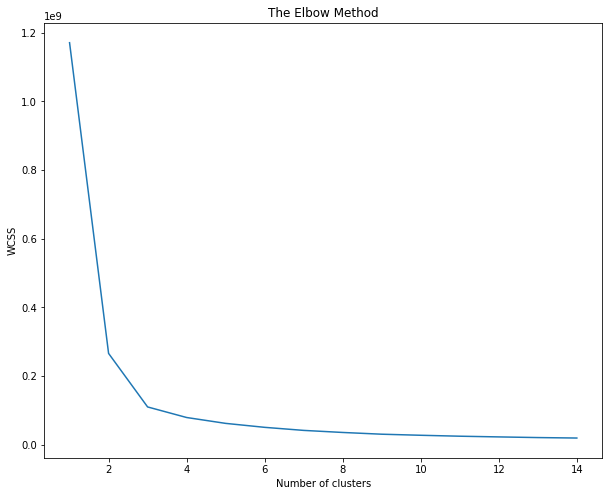

In [28]:
metodoCodo(dataFrio1)

In [29]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFrio1)
centroids = kmeans.cluster_centers_

In [30]:
centroids

array([[ 26.71149408, 143.94220544,  12.7354874 ],
       [ 46.7527082 , 245.27859859,  15.84741728],
       [  5.5567574 ,  10.80390677,  14.56151503],
       [ 69.39363165, 344.25927163,  22.02354776]])

In [31]:
dataTest = [[53.4799995422363, 220.09775, 23.5179996490479]] #datos buenos COP=4.08 linea 52830 dataset limpio
dataTest2 = [[1.37666666507721, 12.037031828125, 0]] #datos malos COP=0.01, linea 44533 dataset sin limpiar

In [32]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([2], dtype=int32)

In [33]:
def diagnosticoFallosFrio1(cluster):
    minPotenciaFrio1 = 0
    maxPotenciaFrio1 = 20
    minPotenciaTermicaFrio1 = 0
    maxPotenciaTermicaFrio1 = 95
    minTempExterior = 10.102595
    maxTempExterior = 27.313549000000002
    if not ((centroids[cluster][0] > minPotenciaFrio1) and (centroids[cluster][0] <= maxPotenciaFrio1)):
        print('Revisar la POTENCIA GRUPO FRÍO 1.')
    if not ((centroids[cluster][1] > minPotenciaTermicaFrio1) and (centroids[cluster][1] <= maxPotenciaTermicaFrio1)):
        print('Revisar la POTENCIA TERMICA GRUPO FRIO 1.')
    if not ((centroids[cluster][2] > minTempExterior) and (centroids[cluster][2] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')

In [34]:
for cluster in clusters:
    diagnosticoFallosFrio1(cluster)

## C_O_P Grupo Frío 2

#### Datos sin limpiar Grupo Frío 2.

In [35]:
dataFrio2 = data3[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']]
dataFrio2.describe()

,POTENCIA GRUPO FRÍO 2,POTENCIA TERMICA GRUPO FRIO 2,TEMPERATURA EXTERIOR
count,79285.000000,79285.000000,79285.000000
mean,27.022629,97.791279,15.083257
std,28.751257,117.645826,11.345877
min,0.000000,0.000000,-1.400000
25%,0.100000,0.000000,6.968000
50%,24.876667,28.784257,13.353139
75%,52.560001,165.611200,23.717333
max,93.536667,412.806886,43.799999


#### Datos limpios Grupo Frío 2. 

In [36]:
dataFrio2Limpio = dataLimpia[['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR',
                               'C_O_P MÁQUINA GRUPO FRÍO 2']]
dataFrio2Limpio.describe()

,POTENCIA GRUPO FRÍO 2,POTENCIA TERMICA GRUPO FRIO 2,TEMPERATURA EXTERIOR,C_O_P MÁQUINA GRUPO FRÍO 2
count,79285.000000,79285.000000,79285.000000,79285.000000
mean,27.399312,190.173695,18.708072,5.319872
std,28.573689,69.326992,8.605477,1.565451
min,0.006667,0.523345,-1.400000,3.171449
25%,0.100000,159.738050,11.900000,4.400816
50%,26.000000,190.173695,18.708072,5.319872
75%,52.560001,190.173695,23.717333,5.319872
max,93.536667,412.806886,43.799999,10.114581


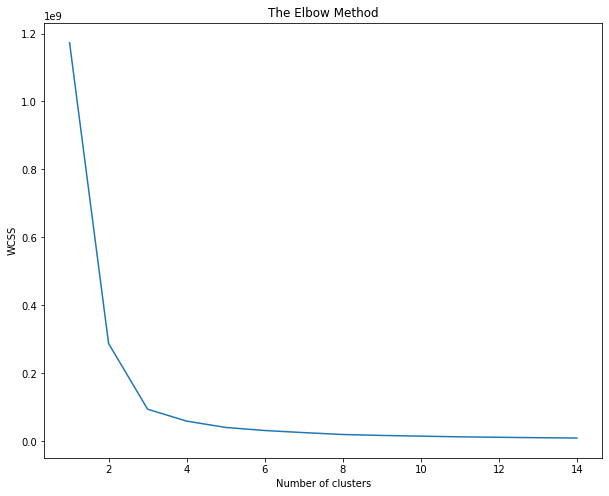

In [37]:
metodoCodo(dataFrio2)

In [38]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(dataFrio2)
centroids = kmeans.cluster_centers_

In [39]:
centroids

array([[  4.2605467 ,   1.82211187,  13.19036002],
       [ 54.06548508, 227.64676692,  16.74666853],
       [ 39.94826147, 123.48842976,  14.91798045],
       [ 71.13601291, 326.18714106,  21.65540997]])

In [40]:
dataTest = [[22.1800003051758, 83.910431828125, 18.7080717440297]] #datos buenos COP=3.80 linea 41825 dataset limpio
dataTest2 = [[0.100000001490116, 377.33531365625, 0]] #datos malos COP=27.95, linea 66628 dataset sin limpiar

In [41]:
#El método predict me dice ese conjunto de datos a qué cluster pertenece(los puntos a dónde son más cercanos).
clusters = kmeans.predict(dataTest2)
clusters

array([3], dtype=int32)

In [42]:
def diagnosticoFallosFrio2(cluster):
    minPotenciaFrio2 = 0
    maxPotenciaFrio2 = 27
    minPotenciaTermicaFrio2 = 0
    maxPotenciaTermicaFrio2 = 97
    minTempExterior = 10.102595
    maxTempExterior = 27.313549000000002
    if not ((centroids[cluster][0] > minPotenciaFrio2) and (centroids[cluster][0] <= maxPotenciaFrio2)):
        print('Revisar la POTENCIA GRUPO FRÍO 2.')
    if not ((centroids[cluster][1] > minPotenciaTermicaFrio2) and (centroids[cluster][1] <= maxPotenciaTermicaFrio2)):
        print('Revisar la POTENCIA TERMICA GRUPO FRIO 2.')
    if not ((centroids[cluster][2] > minTempExterior) and (centroids[cluster][2] <= maxTempExterior)):
        print('Revisar la TEMPERATURA EXTERIOR.')

In [43]:
for cluster in clusters:
    diagnosticoFallosFrio2(cluster)

Revisar la POTENCIA GRUPO FRÍO 2.
Revisar la POTENCIA TERMICA GRUPO FRIO 2.
